# Practical session 3 - Brownian motion, Fourier transform

Students (pair):
- [Mathis Guckert]([link](https://github.com/MGuckert))
- [Gabriele Gardois]([link](https://github.com/ggardo))

```
conda create --name=lab3 --file=requirement.txt
conda activate lab3
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab3
```

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <a name="ex1">Exercise 1: Brownian motion</a>

This first exercise consists in generating a Brownian motion on the closed unit ball $\mathcal{B}(\mathbf{0}, 1) = \{ \mathbf{x} \mid \Vert \mathbf{x} \Vert  \leq 1\}$, focusing first on the 2-D case. The Brownian motion is a random walk with independent, identically distributed Gaussian increments, appearing for instance in thermodynamics and statistical mechanics (to model the evolution of a large particle in a medium composed of a large number of small particles, ...). It is also connected to the diffusion process (Einstein).

Let $N \in \mathbb{N}^*$, $\delta > 0$, and $\mathbf{x} = (x_1, x_2) \in  \mathcal{B}(\mathbf{0}, 1)$. The first $N$ steps of a 2-D discrete-time Brownian motion $W$ can be generated as follows

\begin{align*}
    W_0 &= \mathbf{x}, \\
    %
    (\forall n \in \{1, \dotsc, N-1 \}), \quad W_n &= W_{n−1} + \sqrt{\delta} G_n, \quad G_n \sim \mathcal{N}(\mathbf{0}, \mathbf{I}),
\end{align*}

where $\mathcal{N}(\mathbf{0}, \mathbf{I})$ is a Gaussian distribution with mean $\mathbf{0}$ and identity covariance matrix.

1. Define a random generator `rng`, set to a known state for reproducibility (see session 2).

**Answer:**

In [44]:
import numpy as np
rn_seed = 383948462662799 #We choose a random integer
rng = np.random.default_rng(rn_seed)

2. Implement a function `brownian_motion(niter, x, step, rng)` which

    - simulates $W$ until it reaches the boundary of $\mathcal{B}(\mathbf{0}, 1)$, using a maximum of $N$ iterations (`niter`), a starting point $\mathbf{x} \in \mathcal{B}(\mathbf{0}, 1)$ (`x`) and step-size $\delta$ (`step`);
    - interpolates linearly between the two last positions to determine the points $W^*$ where the trajectory crosses the boundary (if applicable);
    - returns both the whole random walk $W$ and, if appropriate, the point at the intersection between the last segment of the trajectory and $\mathcal{B}(\mathbf{0}, 1)$.
 
> Hint: 
> - you can easily derive a closed form expression for $W^*$, observing that $\Vert W^* \Vert^2= 1$ and $W^* \in [W_{n-1}, W_n]$. 
> - you can also take a look at [`np.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html?highlight=roots#numpy.roots) if needed.

> Recall of the Linear Interpolation (LERP) for $n$-dimensional vectors:
> - Clearly, $\vec{D}=\alpha \vec{C}$ with $\alpha \in [0, 1]$ and hence $\vec{P}-\vec{B}= \alpha (\vec{A}-\vec{B})$ which is equivalent to $\vec{P}= (1-\alpha) \vec{B} + \alpha \vec{A}$. 
![alternatvie text](img/for_Course.png)

**Answer:**

In [45]:
def brownian_motion(niter, x, step, rng):
    W = [x] #List containing the points of the Brownian motion
    for i in range(1, niter):
        #We add a new point to the Brownian motion and check if it is outside the unit circle
        W.append(W[i-1] + np.sqrt(step) * rng.normal(size=2)) 
        if np.linalg.norm(W[i]) > 1:
            break
    #If so, we compute the intersection point with the boundary based on the formula given in the hint
    if np.linalg.norm(W[i]) > 1:
        alpha_star = (-np.dot((W[i-1]-W[i]).T,W[i]) - np.sqrt( np.dot((W[i-1]-W[i]).T,W[i])**2 + np.dot((W[i-1]-W[i]).T,W[i-1]-W[i])*(1 - np.dot(W[i].T,W[i])) ) )/(np.dot((W[i]-W[i-1]).T,W[i]-W[i-1]))
        W_star = alpha_star*W[i-1] + (1-alpha_star)*W[i]
        return W, W_star
    else:
        return W, None

brownian_motion(1000, np.array([0.2, 0.4]), 0.01, rng)

([array([0.2, 0.4]),
  array([0.32562583, 0.51796562]),
  array([0.29064289, 0.50095419]),
  array([0.35545802, 0.4741995 ]),
  array([0.42248555, 0.60800929]),
  array([0.2893011 , 0.60906748]),
  array([0.18927334, 0.55000577]),
  array([0.08939389, 0.49575128]),
  array([0.23890198, 0.56868611]),
  array([0.21627865, 0.6830506 ]),
  array([0.09746352, 0.73774551]),
  array([0.20430912, 0.77987854]),
  array([0.29452224, 0.86199047]),
  array([0.51753661, 0.93259615])],
 array([0.42740439, 0.90406056]))

3. Diplay the trajectory of a Brownian motion starting from $\mathbf{x} = (0.2, 0.4)$, using $\delta = 10^{-2}$, $N = 1000$. Display the unit circle on the same figure, and highlight the intersection with the boundary of the domain (whenever it exists).

> Hint: to draw the unit disk, you can use for instance:
> ```python
> circle = plt.Circle((0,0), 1)
> fig, ax = plt.subplots()
> plt.xlim(-1.25,1.25)
> plt.ylim(-1.25,1.25)
> plt.grid(linestyle = "--", zorder = 1)
> ax.set_aspect(1)
> ax.add_artist(circle)
> ```

**Answer:**

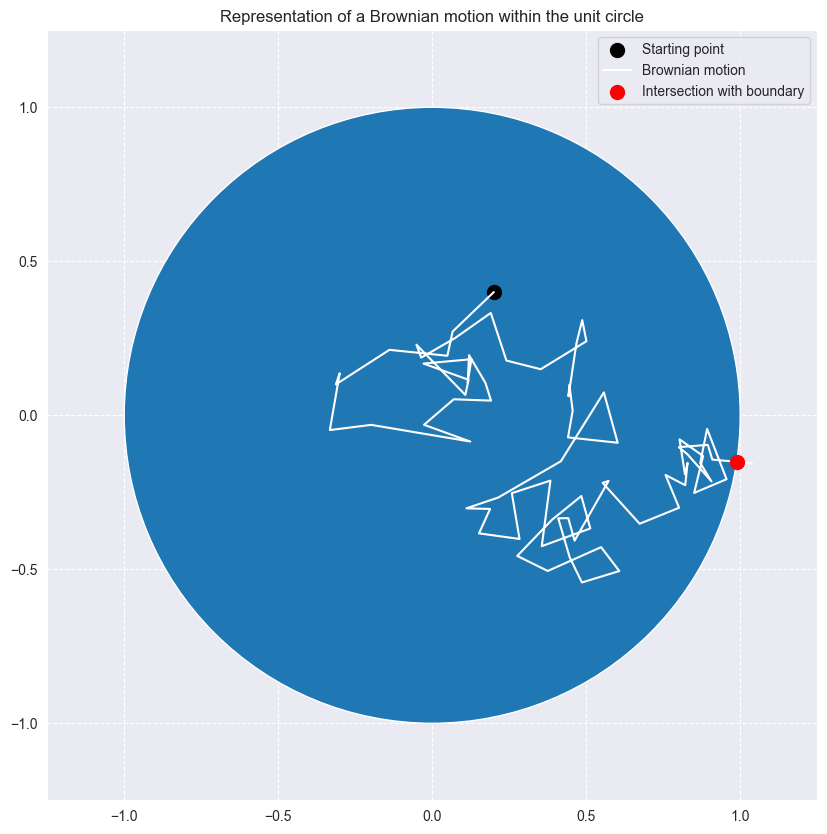

In [46]:
import matplotlib.pyplot as plt

#Plotting the unit circle
circle = plt.Circle((0,0), 1)
fig, ax = plt.subplots() 
fig.set_size_inches(10, 10) #Increase the size of the figure
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid(linestyle = "--", zorder = 1, label="Unit Circle")
ax.set_aspect(1)
ax.add_artist(circle)

#Computation of the Brownian motion
W, W_star = brownian_motion(1000, np.array([0.2, 0.4]), 0.01, rng) 

#Plotting the Brownian motion
plt.scatter(W[0][0], W[0][1], color="black",zorder=2, label = "Starting point", s=100)
plt.plot([w[0] for w in W], [w[1] for w in W], color="white",zorder=2, label = "Brownian motion")

#Plotting the intersection with the boundary (if it exists)
if W_star is not None:
    plt.scatter(W_star[0], W_star[1], color = "red",zorder=3, label="Intersection with boundary",s=100)
    
plt.legend()
plt.title("Representation of a Brownian motion within the unit circle")
plt.show()

4. Represent, on the same figure, 4 other trajectories of $W$ with the same parameters.

**Answer:**

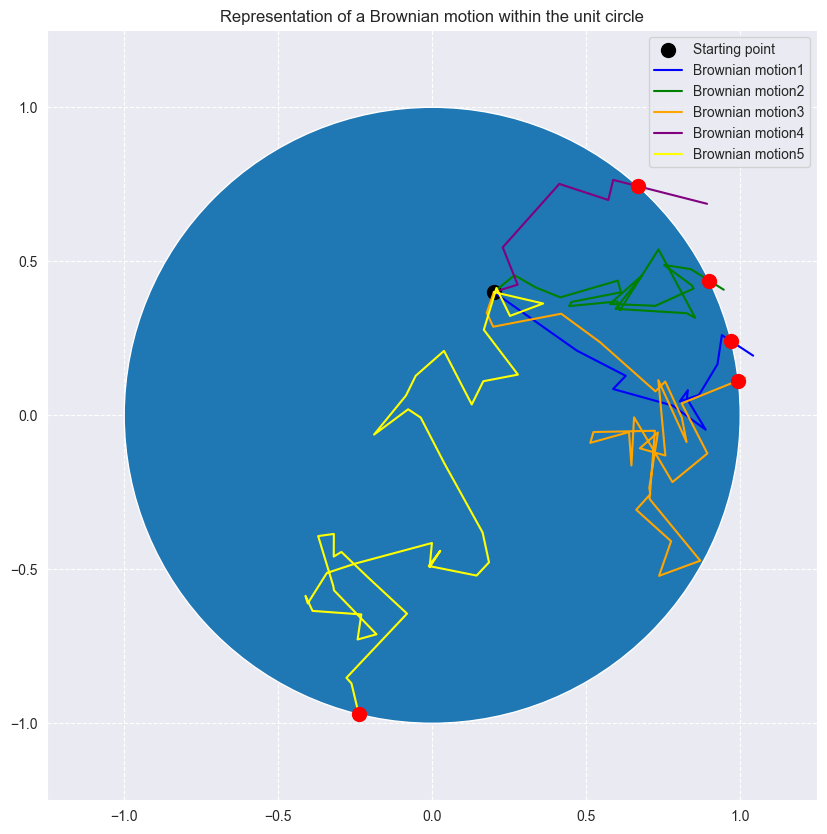

In [47]:

#Plotting the unit circle
circle = plt.Circle((0,0), 1)
fig, ax = plt.subplots() 
fig.set_size_inches(10, 10) #Increase the size of the figure
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid(linestyle = "--", zorder = 1, label="Unit Circle")
ax.set_aspect(1)
ax.add_artist(circle)

colors=["blue","green","orange","purple","yellow"] #List of colors for the Brownian motions
for i in range(5):
    #Computation of the Brownian motion
    W, W_star = brownian_motion(1000, np.array([0.2, 0.4]), 0.01, rng) 

    #Plotting the starting point
    if i==0:
        plt.scatter(W[0][0], W[0][1], color="black",zorder=2, label = "Starting point", s=100)
    
    #Plotting the Brownian motion
    plt.plot([w[0] for w in W], [w[1] for w in W], color=colors[i],zorder=2, label = "Brownian motion" + str(i+1))

    #Plotting the intersection with the boundary (if it exists)
    if W_star is not None:
        plt.scatter(W_star[0], W_star[1], color = "red",zorder=3,s=100)
        
plt.legend()
plt.title("Representation of a Brownian motion within the unit circle")
plt.show()

5. [Bonus] Generalize the procedure to a $M$-dimensional Brownian motion, $M > 2$.

**Answer:**

In [48]:
def brownian_motion(M, niter, x, step, rng):
    W = [x]
    for i in range(1, niter):
        W.append(W[i-1] + np.sqrt(step) * rng.normal(size=M))
        if np.linalg.norm(W[i]) > 1:
            break
    if np.linalg.norm(W[i]) > 1:
        alpha_star = (-np.dot((W[i-1]-W[i]).T,W[i]) - np.sqrt( np.dot((W[i-1]-W[i]).T,W[i])**2 + np.dot((W[i-1]-W[i]).T,W[i-1]-W[i])*(1 - np.dot(W[i].T,W[i])) ) )/(np.dot((W[i]-W[i-1]).T,W[i]-W[i-1]))
        W_star = alpha_star*W[i-1] + (1-alpha_star)*W[i]
        return W, W_star
    else:
        return W, None
    
#Example with M=3
brownian_motion(3, 1000, np.array([0.2, 0.4, 0.5]), 0.01, rng)

([array([0.2, 0.4, 0.5]),
  array([0.23839921, 0.42097511, 0.5355385 ]),
  array([0.15572521, 0.31237469, 0.57154684]),
  array([0.22127434, 0.37968846, 0.58189417]),
  array([0.29930114, 0.46975895, 0.55381767]),
  array([0.33933984, 0.64168106, 0.6369509 ]),
  array([0.32838863, 0.60382522, 0.75317993])],
 array([0.33210481, 0.61667123, 0.71373874]))

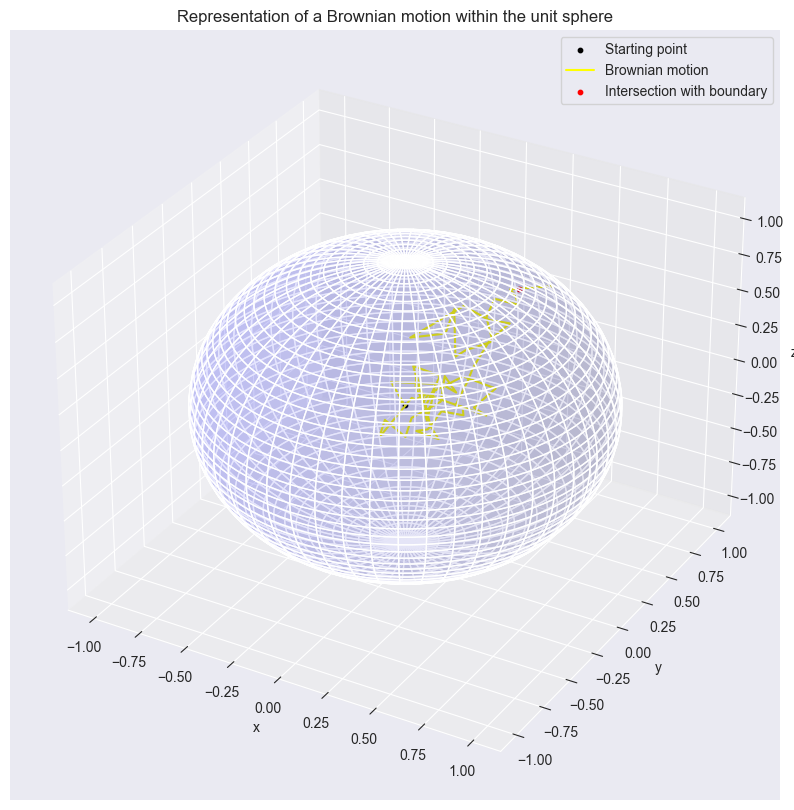

In [49]:
#Plot in 3D

#Plotting the unit sphere (code from https://matplotlib.org/stable/gallery/mplot3d/surface3d_2.html)
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b', alpha=0.1) #Alpha corresponds to the transparency of the sphere

#Computation of the Brownian motion
W, W_star = brownian_motion(3, 1000, np.array([0.0, 0.0, 0.0]), 0.01, rng)

#Plotting the starting point
ax.scatter(W[0][0], W[0][1], W[0][2], color="black",zorder=2, label = "Starting point", s=10)

#Plotting the Brownian motion
ax.plot([w[0] for w in W], [w[1] for w in W], [w[2] for w in W], color="yellow",zorder=2, label = "Brownian motion")

#Plotting the intersection with the boundary (if it exists)
if W_star is not None:
    ax.scatter(W_star[0], W_star[1], W_star[2], color = "red",zorder=3, label="Intersection with boundary",s=10)
    
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")    

plt.legend()
plt.title("Representation of a Brownian motion within the unit sphere")
plt.show()

---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a>

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `img/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

**Answer:**

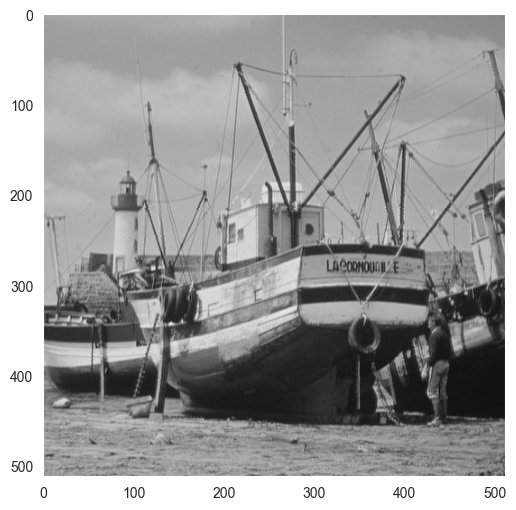

(None,)

In [50]:
from PIL import Image
img = Image.open('./img/boat.png')
fig = plt.figure(figsize=(10, 6))
plt.imshow(img)
#Remove the grid
plt.grid(False)
plt.show(),

2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

**Answer:**

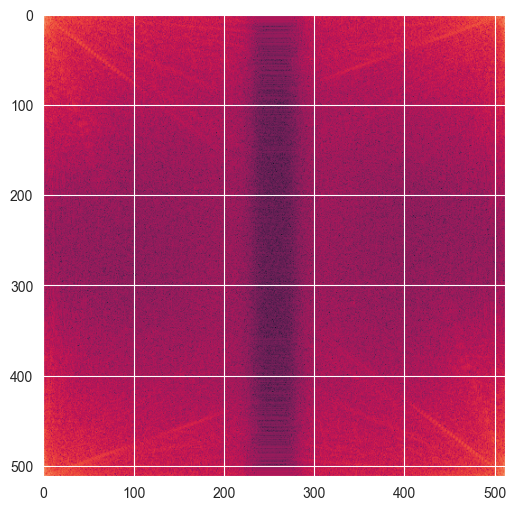

In [51]:
#Convert image to numpy array
X = np.asarray(img)

#Compute the FFT
X_fft = np.fft.fft2(X)

fig = plt.figure(figsize=(10, 6))
plt.imshow(np.log(abs(X_fft)**2))
plt.show()

a) In this representation, the pixel of the spectrum associated with the zero frequency is situated "in the four corners" of the picture. Using the `np.fft.fftshift` function (see below) puts the zero-frequency pixel at the center.

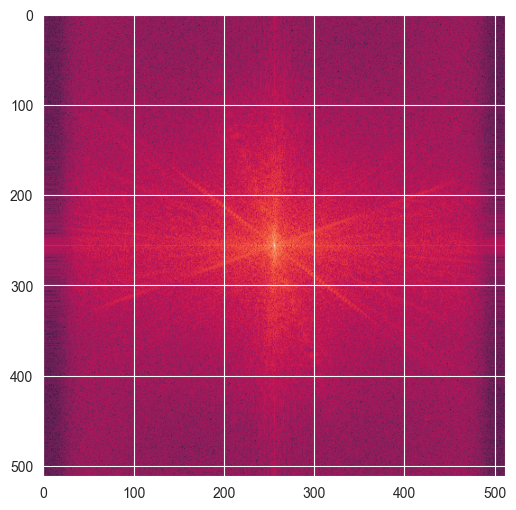

In [52]:
#Use np.fft.fftshift to shift the zero-frequency component to the center of the spectrum
X_fft = np.fft.fftshift(X_fft)

fig = plt.figure(figsize=(10, 6))
plt.imshow(np.log(abs(X_fft)**2))
plt.show()

3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

**Answer:**

a)

top:246, bottom:266, left:246, right:266
top:206, bottom:306, left:206, right:306


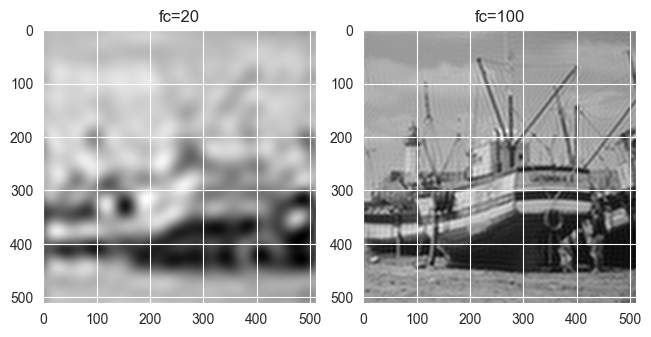

In [53]:
def ideal_lowpass_filter(X, fc):
    # Computation of the FFT(X) and shifting
    X_fft = np.fft.fft2(X)
    X_ffts = np.fft.fftshift(X_fft)

    # Boundaries definition for getting only frequences f < fc (the ones in the center of X_ffts)
    top = int(X.shape[0]/2-fc/2); bottom = int(X.shape[0]/2+fc/2)
    left = int(X.shape[1]/2-fc/2); right = int(X.shape[1]/2+fc/2)
    print(f"top:{top}, bottom:{bottom}, left:{left}, right:{right}")

    # Filtering of the shifted matrix, setting unwanted frequency to 0
    X_ffts_low = np.zeros((X.shape[0], X.shape[1]), dtype=np.complex_)
    X_ffts_low[top:bottom ,left:right] = X_ffts[top:bottom ,left:right]
    
    # Deshifting of the filtered matrix
    X_fft_low = np.fft.ifftshift(X_ffts_low)
    # Inverse of the FFT
    X_low = np.fft.ifft2(X_fft_low)
    return X_low

fig, axs = plt.subplots(1, 2, layout='constrained')
# X_low is a complex matrix, for getting only the real part
fc0=20
axs[0].set_title(f"fc={fc0}")
axs[0].imshow(np.real(ideal_lowpass_filter(X, fc0)), cmap="gray")
fc1=100
axs[1].set_title(f"fc={fc1}")
axs[1].imshow(np.real(ideal_lowpass_filter(X, fc1)), cmap="gray")
plt.show()

b)

top:106, bottom:406, left:106, right:406
top:181, bottom:331, left:181, right:331
top:231, bottom:281, left:231, right:281


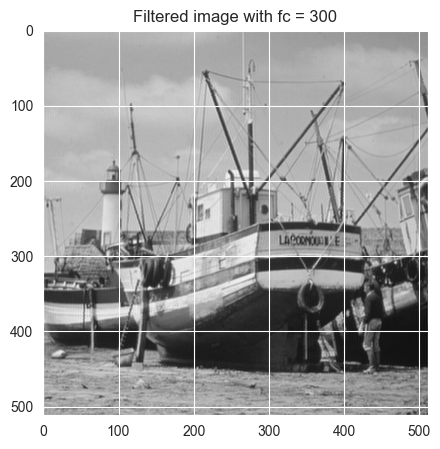

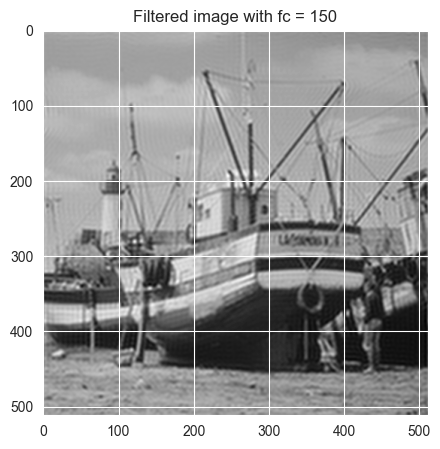

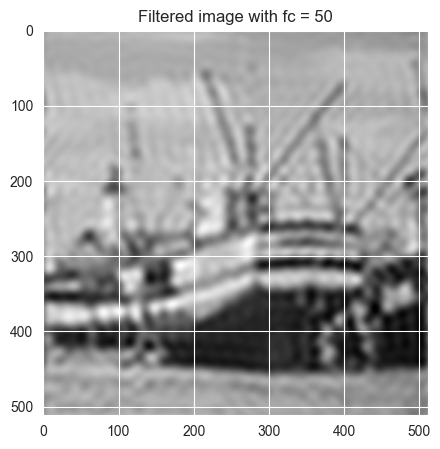

In [54]:
 for fc in [300,150,50]:
    X_filtered = ideal_lowpass_filter(X,fc)
    fig = plt.figure()
    fig.set_size_inches(5, 5)
    plt.title("Filtered image with fc = " + str(fc))
    plt.imshow(np.abs(X_filtered),cmap='gray')
plt.show()

The more we increase the cutoff frequencies, the more the image blurs and appears noisy. In fact, using a low-pass filter allows to smoothen the image and removes high frequencies components, that is sharp transitions in the image and punctal details. The less we kee frequency components, the less information we keep about our image, and thus, the more it appears blurred.

4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} = \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform.

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis) (or `np.reshape` or built-in `np.outer`).

**Answer:**

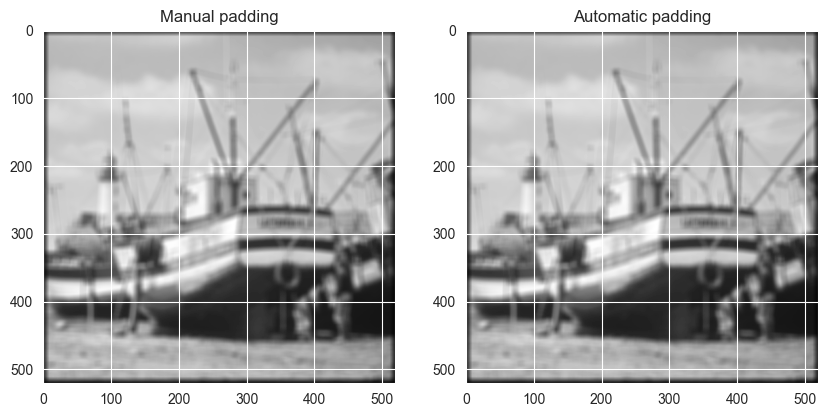

In [55]:
from scipy import signal
M1, N1 = X.shape
M2 = 10
N2 = 10
wx= signal.windows.gaussian(N2, std=10)
wy= signal.windows.gaussian(M2, std=10)
H = np.outer(wy,wx)

def P(X):
    M = M1+M2-1
    N = N1+N2-1
    X_padded = np.zeros((M,N))
    X_padded[:X.shape[0],:X.shape[1]] = X
    return X_padded

M = M1+M2-1
N = N1+N2-1

#Manual padding
X_conv = np.fft.irfft2(np.fft.rfft2(P(X))*np.fft.rfft2(P(H)))
#Automatic padding
X_conv2 = np.fft.irfft2(np.fft.rfft2(X, s=(M,N))*np.fft.rfft2(H, s=(M,N)))

fig,axs = plt.subplots(1,2,figsize=(10, 6))
axs[0].imshow(np.abs(X_conv),cmap='gray')
axs[0].set_title("Manual padding")
axs[1].imshow(np.abs(X_conv2),cmap='gray')
axs[1].set_title("Automatic padding")
plt.show()

We can start by checking that our code is working by computing the convolution using the `signal.convolve2d` function from `scipy`.

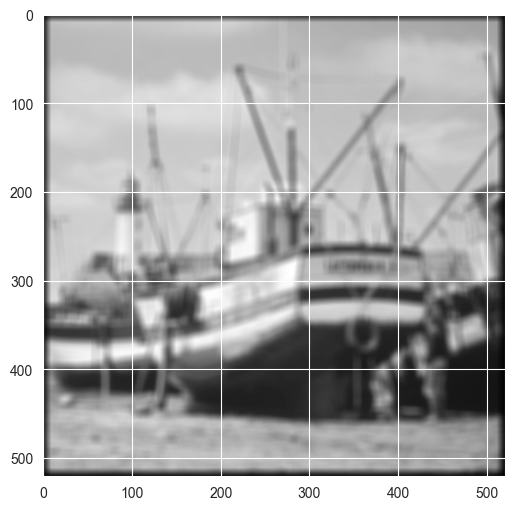

In [56]:
X_conv2 = signal.convolve2d(X, H, mode='full')

fig = plt.figure(figsize=(10, 6))
plt.imshow(np.abs(X_conv2), cmap='gray')
plt.show()

The second method gives the same result as the first one.

We observe a blurred version of our image, quite similar to the one obtained with the low-pass filter. We can also observe the the borders of our image are completely blurred, and appear white. One reason for this might be the use of padding to ensure the good dimension of our image for convolution.